In [1]:
import requests
import json
import matplotlib.pyplot as plt
import os
from pprint import pprint
import pandas as pd
import numpy as np
from datetime import datetime


In [2]:
results_path = os.path.join("Output_data", "% positive tests by month.csv")
months_df = pd.read_csv(results_path)

# Unique Months into list

month_names = ["March","April","May","June","July","August","September"]

months_df["TX_%"] = months_df["TX_%"] *100
months_df["NY_%"] = months_df["NY_%"] *100

month_values = months_df["month"].sort_values().unique().tolist()

months_df = months_df.groupby(by="month",axis=0,as_index=False).mean() 
months_df["month"] = months_df["month"].replace(month_values,month_names)

months_df["% Pos"] = months_df[["TX_%","NY_%"]].mean(axis=1)

months_df.head()


,month,TX_tot,NY_tot,day,TX_%,NY_%,% Pos
0,March,8.431357e+03,5.227643e+04,17.5,49.624643,30.272500,39.948571
1,April,1.666578e+05,5.430857e+05,15.5,9.607000,38.849000,24.228000
2,May,6.343455e+05,1.411822e+06,16.0,7.393226,25.481935,16.437581
3,June,1.361634e+06,3.024553e+06,15.5,7.230667,13.089333,10.160000
4,July,2.752856e+06,4.925164e+06,16.0,10.529355,8.313871,9.421613


In [3]:

#Rename
results_df = months_df.rename(columns={"month":"Month"})


results_df = results_df.drop(columns={"TX_tot","NY_tot",
                                       "day","TX_%","NY_%"})
results_df["Year"] = 2020
results_df.head(7)


,Month,% Pos,Year
0,March,39.948571,2020
1,April,24.228000,2020
2,May,16.437581,2020
3,June,10.160000,2020
4,July,9.421613,2020
5,August,9.104839,2020
6,September,8.550833,2020


In [4]:
gender_path = os.path.join("Output_data", "gender.csv")
gender_df = pd.read_csv(gender_path)
gender_df = gender_df.rename(columns={"% M Unempl":"% Men Unemployed", 
                                       "% F Unempl":"% Women Unemployed"})

gender_df.head(24)
gender_df.head()

,Month,Year,% Men Unemployed,% Women Unemployed
0,January,2019,3.7,3.6
1,February,2019,3.5,3.4
2,March,2019,3.6,3.3
3,April,2019,3.4,3.1
4,May,2019,3.4,3.3


In [5]:

combined_data = pd.merge(results_df, gender_df, on=["Month","Year"])
combined_data.head(9)



,Month,% Pos,Year,% Men Unemployed,% Women Unemployed
0,March,39.948571,2020,4.0,4.0
1,April,24.228000,2020,13.0,15.5
2,May,16.437581,2020,11.6,13.9
3,June,10.160000,2020,10.2,11.2
4,July,9.421613,2020,9.4,10.5
5,August,9.104839,2020,8.0,8.4


In [6]:

#Export to csv
output_file = os.path.join("Output_data","% positive tests and unemployment.csv")
combined_data.to_csv(output_file, index=False, header=True)


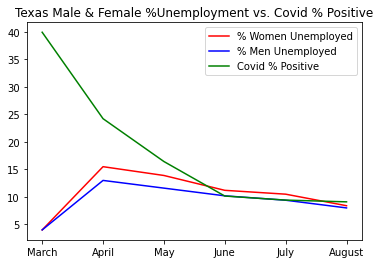

In [7]:
percent_women = combined_data["% Women Unemployed"]
percent_men = combined_data["% Men Unemployed"]
months = combined_data["Month"]
pos_perc = combined_data["% Pos"]

women_perc = plt.plot(months, percent_women, color="red")
men_perc = plt.plot(months, percent_men, color="blue")
pos = plt.plot(months, pos_perc, color="green")
plt.legend(handles=[women_perc[0], men_perc[0], pos[0]], labels=["% Women Unemployed", "% Men Unemployed", "Covid % Positive "], loc="best")
plt.title("Texas Male & Female %Unemployment vs. Covid % Positive")
plt.show()

In [8]:

#Export Graph to Images as PNG
output_path = os.path.join("Images","Texas Male & Female %Unemployment vs. Covid % Positive.png")
plt.savefig(output_path)


<Figure size 432x288 with 0 Axes>

In [9]:

# For months of May - August
reduced_data = combined_data.iloc[[3,4,5],:]
reduced_data.head()


,Month,% Pos,Year,% Men Unemployed,% Women Unemployed
3,June,10.160000,2020,10.2,11.2
4,July,9.421613,2020,9.4,10.5
5,August,9.104839,2020,8.0,8.4


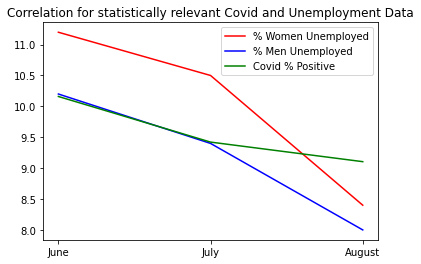

In [10]:
percent_women = reduced_data["% Women Unemployed"]
percent_men = reduced_data["% Men Unemployed"]
months = reduced_data["Month"]
pos_perc = reduced_data["% Pos"]

women_perc = plt.plot(months, percent_women, color="red")
men_perc = plt.plot(months, percent_men, color="blue")
pos = plt.plot(months, pos_perc, color="green")
plt.legend(handles=[women_perc[0], men_perc[0], pos[0]], labels=["% Women Unemployed", "% Men Unemployed", "Covid % Positive "], loc="best")
plt.title("Correlation for statistically relevant Covid and Unemployment Data")
plt.show()

In [11]:

#Export Graph to Images as PNG
output_path = os.path.join("Images","Reduced TX % Unemployment vs. Covid % Positive.png")
plt.savefig(output_path)


<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Unemployement')

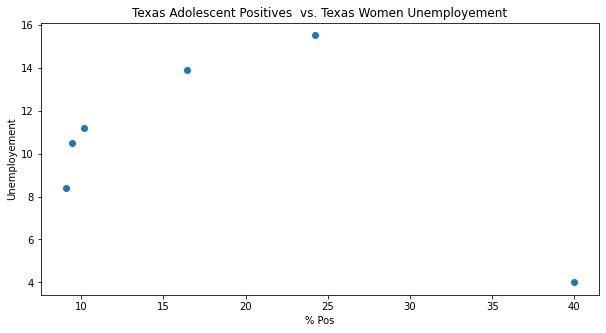

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(combined_data["% Pos"], combined_data["% Women Unemployed"])
plt.title("Texas Adolescent Positives  vs. Texas Women Unemployement")
plt.xlabel("% Pos")
plt.ylabel("Unemployement")

In [13]:
#Export Graph to Images as PNG
output_path = os.path.join("Images","Texas Adolescent Positives vs. Women Unemployment.png")
plt.savefig(output_path)

<Figure size 432x288 with 0 Axes>

In [14]:
combined_data.head(9)

,Month,% Pos,Year,% Men Unemployed,% Women Unemployed
0,March,39.948571,2020,4.0,4.0
1,April,24.228000,2020,13.0,15.5
2,May,16.437581,2020,11.6,13.9
3,June,10.160000,2020,10.2,11.2
4,July,9.421613,2020,9.4,10.5
5,August,9.104839,2020,8.0,8.4


Text(0, 0.5, 'Unemployement')

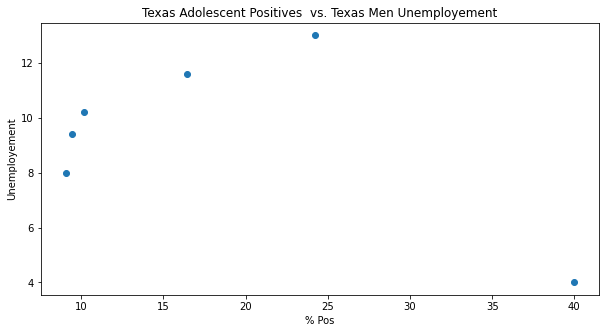

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(combined_data["% Pos"], combined_data["% Men Unemployed"])
plt.title("Texas Adolescent Positives  vs. Texas Men Unemployement")
plt.xlabel("% Pos")
plt.ylabel("Unemployement")

In [16]:
#Export Graph to Images as PNG
output_path = os.path.join("Images","Texas Adolescent Positives vs. Men Unemployement.png")
plt.savefig(output_path)

<Figure size 432x288 with 0 Axes>